# Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis


### 1. Importing libraries and data

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# Show plots directly in the Jupyter notebook

%matplotlib inline

# Column display options

pd.options.display.max_columns = 50

In [74]:
# declare a data path and import data

data_path = r'C:\Users\gerar\CareerFoundry Python\Spotify charts streaming analysis'

df_spotify = pd.read_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'spotify_clean_no_global.pkl'))

df_spotify.sample(n=5)
                

                                    

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,collab,track_name,album_num_tracks,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1414798,spotify:track:5dXWFMwD7I7zXsInONVl0H,192,SZA,1.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,0,I Hate U,1.0,76,-1,7,12848,2022-03-03,0.535,0.388,7.0,0.0,-9.805,0.1550,0.507000,0.000000,0.1100,0.412,106.703,174000.0,Saudi Arabia,Middle East,Arabic,0
1685793,spotify:track:0pJQI29n8ZfWTTUWn6Ncvb,104,Pornofilmy,1.0,Pornofilmy,spotify:artist:47jBQjRmURjRn3XfLIaHvV,russian alt pop,0,Я так соскучился,14.0,56,102,51,35877,2021-12-02,0.326,0.796,9.0,0.0,-4.976,0.0430,0.000584,0.002550,0.0898,0.182,101.507,408875.0,Ukraine,Europe,Ukrainian,0
690308,spotify:track:3J8EOeKLTLXORtWPpOU5bE,83,"Lil Tjay, 6LACK",2.0,6LACK,spotify:artist:4IVAbR2w4JJNJDDRFP3E83,trap,1,Calling My Phone,21.0,4,69,11,40535,2021-04-29,0.907,0.393,4.0,0.0,-7.636,0.0539,0.451000,0.000001,0.1350,0.202,104.949,205458.0,Greece,Europe,Greek,1
1679870,spotify:track:22skzmqfdWrjJylampe0kt,195,"Macklemore & Ryan Lewis, Macklemore, Ryan Lewi...",4.0,Ray Dalton,spotify:artist:4e0nWw2r4BoQSKPQ2zpU13,0,1,Can't Hold Us (feat. Ray Dalton),15.0,98,197,126,371898,2022-02-10,0.633,0.927,2.0,1.0,-4.468,0.0839,0.026700,0.000000,0.0986,0.880,146.097,258432.0,United Kingdom,Europe,English,1
943576,spotify:track:6IO5nn84TKArsi3cjpIqaD,32,Ryokuoushoku Shakai,1.0,Ryokuoushoku Shakai,spotify:artist:4SJ7qRgJYNXB9Yttzs4aSa,j-pop,0,Mela!,1.0,22,33,111,793413,2022-06-09,0.619,0.941,8.0,1.0,-1.618,0.0584,0.043900,0.000017,0.3180,0.624,137.967,242067.0,Japan,Asia,Japanese,0


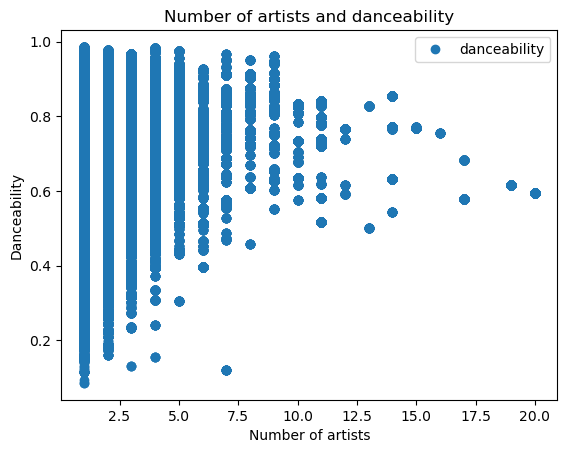

In [75]:
# Create a scatter plot
df_spotify.plot(x = 'artists_num', y='danceability',style='o')

# Add labels and title
plt.xlabel('Number of artists')
plt.ylabel('Danceability')
plt.title('Number of artists and danceability')
plt.show()

**Danceability according to the Spotify API:**


_Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable._

API: 
https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features

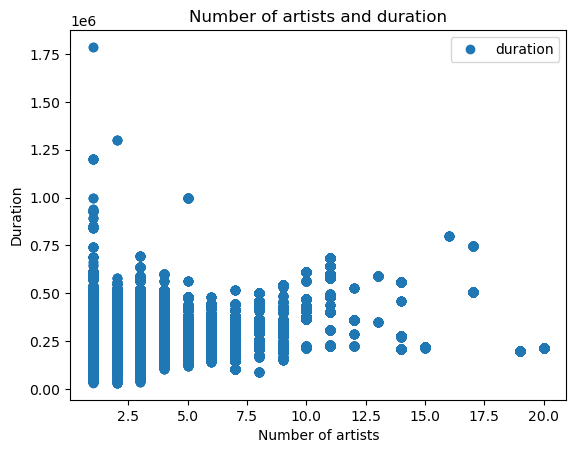

In [77]:
# Create a scatter plot
df_spotify.plot(x = 'artists_num', y='duration',style='o')

# Add labels and title
plt.xlabel('Number of artists')
plt.ylabel('Duration')
plt.title('Number of artists and duration')
plt.show()

In my original correlation matrix I had the following coefficients

Number of artists - Danceability: 0.194239

Number of artists - Duration: 0.422668

Although the coefficient is higher with number of artists vs. duration and would probably deliver a better fit, I decided to use danceability because it seems to deliver a more valuable insight.

It seems somewhat obvious that more artists equal longer songs since they need more time to fit more artists. 


The spotify api model that rated danceability did not consider number of artists which makes it interesting that these two variables have some correlation. 

In [79]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_spotify['artists_num'].values.reshape(-1,1)
y = df_spotify['danceability'].values.reshape(-1,1)

In [80]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis (danceability)

In [82]:
# Create a regression object.

regression = LinearRegression()

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

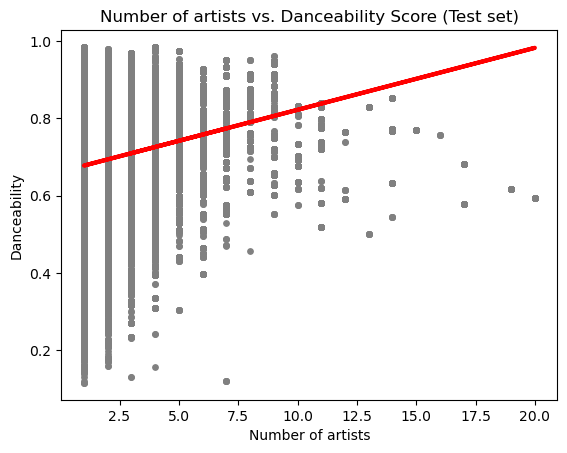

In [85]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of artists vs. Danceability Score (Test set)')
plot_test.xlabel('Number of artists')
plot_test.ylabel('Danceability')
plot_test.show()

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [87]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01603002]]
Mean squared error:  0.01680596508275944
R2 score:  0.037829361935663774


**Descriptive statistics of the variables (for context)**

In [89]:
df_spotify['artists_num'].describe()

count    1.691599e+06
mean     2.247450e+00
std      1.625682e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: artists_num, dtype: float64

In [90]:
df_spotify['danceability'].describe()

count    1.691599e+06
mean     6.979214e-01
std      1.319994e-01
min      8.590000e-02
25%      6.120000e-01
50%      7.210000e-01
75%      7.970000e-01
max      9.860000e-01
Name: danceability, dtype: float64

In [91]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(15)

,Actual,Predicted
0,0.841,0.774267
1,0.746,0.710147
2,0.694,0.678087
3,0.714,0.678087
4,0.861,0.694117
5,0.689,0.694117
6,0.773,0.678087
7,0.811,0.710147
8,0.572,0.694117
9,0.742,0.694117


### Insight: Number of artists and duration

The model's slope shows a small positive relationship between variables, but the R² score of 0.037 suggests it explains only 3.7% of the variance, indicating a weak fit. The MSE of 0.0168 is relatively small, meaning predictions are somewhat close to actual values, but the low R² suggests that the model isn't capturing much of the data's variability

### Regression Analysis: Duration

In [94]:
# Reshape the variables into NumPy arrays and put them into separate objects.

W = df_spotify['artists_num'].values.reshape(-1,1)
z = df_spotify['duration'].values.reshape(-1,1)

In [95]:
# Split data into a training set and a test set.

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.3, random_state=0)

In [96]:
# Create a regression object.

regression2 = LinearRegression()

In [97]:
# Fit the regression object onto the training set.

regression2.fit(W_train, z_train)

LinearRegression()

In [98]:
# Predict the values of y using X.

z_predicted = regression2.predict(W_test)

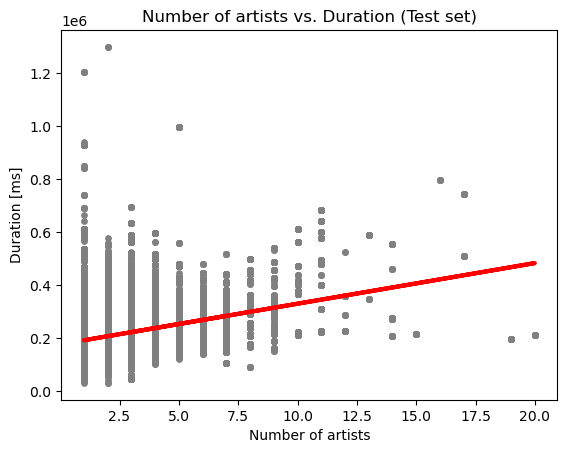

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(W_test, z_test, color='gray', s = 15)
plot_test2.plot(W_test, z_predicted, color='red', linewidth =3)
plot_test2.title('Number of artists vs. Duration (Test set)')
plot_test2.xlabel('Number of artists')
plot_test2.ylabel('Duration [ms]')
plot_test2.show()

In [100]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(z_test, z_predicted)
r2_2 = r2_score(z_test, z_predicted) 

In [101]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[15337.46251018]]
Mean squared error:  2841496078.778264
R2 score:  0.17971810939462474


**Descriptive statistics of the variables (for context)**

In [103]:
df_spotify['duration'].describe()

count    1.691599e+06
mean     2.115581e+05
std      5.868192e+04
min      3.126700e+04
25%      1.733810e+05
50%      2.024670e+05
75%      2.340000e+05
max      1.787030e+06
Name: duration, dtype: float64

In [104]:
df_spotify['artists_num'].describe()

count    1.691599e+06
mean     2.247450e+00
std      1.625682e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: artists_num, dtype: float64

In [105]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': z_test.flatten(), 'Predicted': z_predicted.flatten()})
data_2.head(15)

,Actual,Predicted
0,382555.0,284398.169853
1,222004.0,223048.319812
2,146087.0,192373.394792
3,177955.0,192373.394792
4,171232.0,207710.857302
5,218853.0,207710.857302
6,165265.0,192373.394792
7,175187.0,223048.319812
8,215733.0,207710.857302
9,238720.0,207710.857302


### Insight: Number of artists and duration


The model suggests that more artists are linked to longer track durations, but it doesn't fit the data very well. With an R² of just 0.179 and a high MSE, it only explains 17.9% of the variation in duration. The model might need additional features or refinement to improve accuracy.

### Possible Data Bias

I believe since the models don't have such a good fit there is not a good possibility that this data insights affect other people.

It could be possible to remove outliers from this dataset (specifically that song with 29 minutes). But I don't believe this would improve this model so much. 

In the last notebook with the pair plots, many of the relationships didn't seem linear to me. Some of them looked as if they were polynomial or fell into the form created by this graph

y= 1/x

My current knowledge does not allow me to arrive to further insights. 